In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [3]:
url = 'https://www.mohfw.gov.in/'
html = urlopen(url)

In [4]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [5]:
title = soup.title
print(title)

<title>MoHFW | Home</title>


In [6]:
rows = soup.find_all('tr')
print(rows[:10])

[<tr>
<th><strong>S. No.</strong></th>
<th><strong>Name of State / UT</strong></th>
<th><strong>Active Cases*</strong></th>
<th><strong>Cured/Discharged/Migrated*</strong></th>
<th><strong>Deaths**</strong></th>
<th><strong>Total Confirmed cases*</strong></th>
</tr>, <tr>
<td>1</td>
<td>Andaman and Nicobar Islands</td>
<td>16</td>
<td>43</td>
<td>0</td>
<td>59</td>
</tr>, <tr>
<td>2</td>
<td>Andhra Pradesh</td>
<td>5760</td>
<td>4988</td>
<td>136</td>
<td>10884</td>
</tr>, <tr>
<td>3</td>
<td>Arunachal Pradesh</td>
<td>121</td>
<td>38</td>
<td>1</td>
<td>160</td>
</tr>, <tr>
<td>4</td>
<td>Assam</td>
<td>2279</td>
<td>4033</td>
<td>9</td>
<td>6321</td>
</tr>, <tr>
<td>5</td>
<td>Bihar</td>
<td>1975</td>
<td>6441</td>
<td>57</td>
<td>8473</td>
</tr>, <tr>
<td>6</td>
<td>Chandigarh</td>
<td>88</td>
<td>329</td>
<td>6</td>
<td>423</td>
</tr>, <tr>
<td>7</td>
<td>Chhattisgarh</td>
<td>685</td>
<td>1755</td>
<td>12</td>
<td>2452</td>
</tr>, <tr>
<td>8</td>
<td>Dadra and Nagar Haveli and Dam

In [7]:
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td align="center" colspan="6" style="text-align:center;"><strong>#Our figures are being reconciled with ICMR</strong></td>]


bs4.element.ResultSet

In [8]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[#Our figures are being reconciled with ICMR]


In [9]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[#Our figures are being reconciled with ICMR]


str

In [10]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[1, Andaman and Nicobar Islands, 16, 43, 0, 59]"
2,"[2, Andhra Pradesh, 5760, 4988, 136, 10884]"
3,"[3, Arunachal Pradesh, 121, 38, 1, 160]"
4,"[4, Assam, 2279, 4033, 9, 6321]"
5,"[5, Bihar, 1975, 6441, 57, 8473]"
6,"[6, Chandigarh, 88, 329, 6, 423]"
7,"[7, Chhattisgarh, 685, 1755, 12, 2452]"
8,"[8, Dadra and Nagar Haveli and Daman and Diu, ..."
9,"[9, Delhi, 26586, 44765, 2429, 73780]"


In [11]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5
0,[],None,None,None,None,None
1,[1,Andaman and Nicobar Islands,16,43,0,59]
2,[2,Andhra Pradesh,5760,4988,136,10884]
3,[3,Arunachal Pradesh,121,38,1,160]
4,[4,Assam,2279,4033,9,6321]
5,[5,Bihar,1975,6441,57,8473]
6,[6,Chandigarh,88,329,6,423]
7,[7,Chhattisgarh,685,1755,12,2452]
8,[8,Dadra and Nagar Haveli and Daman and Diu,123,32,0,155]
9,[9,Delhi,26586,44765,2429,73780]


In [12]:
df1[5]

0             None
1              59]
2           10884]
3             160]
4            6321]
5            8473]
6             423]
7            2452]
8             155]
9           73780]
10            995]
11          29520]
12          12463]
13            839]
14           6549]
15           2262]
16          10560]
17           3726]
18            941]
19          12596]
20         147741]
21           1056]
22             46]
23            145]
24            355]
25           5962]
26            502]
27           4769]
28          16296]
29             85]
30          70977]
31          11364]
32           1290]
33           2691]
34          20193]
35          15648]
36           8123]
37     \n490401\n]
38            None
39            None
40            None
41            None
Name: 5, dtype: object

In [13]:
df1[0] = df1[0].str.strip('[')

df1.head(10)

,0,1,2,3,4,5
0,],None,None,None,None,None
1,1,Andaman and Nicobar Islands,16,43,0,59]
2,2,Andhra Pradesh,5760,4988,136,10884]
3,3,Arunachal Pradesh,121,38,1,160]
4,4,Assam,2279,4033,9,6321]
5,5,Bihar,1975,6441,57,8473]
6,6,Chandigarh,88,329,6,423]
7,7,Chhattisgarh,685,1755,12,2452]
8,8,Dadra and Nagar Haveli and Daman and Diu,123,32,0,155]
9,9,Delhi,26586,44765,2429,73780]


In [14]:
col_labels = soup.find_all('th')

In [15]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[S. No., Name of State / UT, Active Cases*, Cured/Discharged/Migrated*, Deaths**, Total Confirmed cases*]']


In [16]:
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[S. No., Name of State / UT, Active Cases*, Cu..."


In [17]:
df3 = df2[0].str.split(',', expand=True)
df3.head()

,0,1,2,3,4,5
0,[S. No.,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*]


In [18]:
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5
0,[S. No.,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*]
0,],None,None,None,None,None
1,1,Andaman and Nicobar Islands,16,43,0,59]
2,2,Andhra Pradesh,5760,4988,136,10884]
3,3,Arunachal Pradesh,121,38,1,160]
4,4,Assam,2279,4033,9,6321]
5,5,Bihar,1975,6441,57,8473]
6,6,Chandigarh,88,329,6,423]
7,7,Chhattisgarh,685,1755,12,2452]
8,8,Dadra and Nagar Haveli and Daman and Diu,123,32,0,155]


In [19]:
df5= df4.iloc[:,1:]

In [20]:
df5.head()

,1,2,3,4,5
0,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*]
0,None,None,None,None,None
1,Andaman and Nicobar Islands,16,43,0,59]
2,Andhra Pradesh,5760,4988,136,10884]
3,Arunachal Pradesh,121,38,1,160]


In [21]:
df6 =df5.iloc[2:,:]

In [22]:
df6.head()

,1,2,3,4,5
1,Andaman and Nicobar Islands,16,43,0,59]
2,Andhra Pradesh,5760,4988,136,10884]
3,Arunachal Pradesh,121,38,1,160]
4,Assam,2279,4033,9,6321]
5,Bihar,1975,6441,57,8473]


In [23]:
# df6.to_csv('file.csv')

In [24]:
data = pd.read_csv('file.csv')
data.head(36)

,Name of State/UT,Active cases,Recovered cases,Deaths,Total Confirmed Cases
0,Andaman and Nicobar Islands,11,37,0,48
1,Andhra Pradesh,4766,4495,111,9372
2,Arunachal Pradesh,118,21,0,139
3,Assam,2056,3521,9,5586
4,Bihar,1989,5781,55,7825
5,Chandigarh,83,322,6,411
6,Chhattisgarh,778,1513,12,2303
7,Dadra and Nagar Haveli and Daman and Diu,64,27,0,91
8,Delhi,23820,36602,2233,62655
9,Goa,711,152,1,864


In [25]:
data.tail()

,Name of State/UT,Active cases,Recovered cases,Deaths,Total Confirmed Cases
31,Tripura,454,782,1,1237
32,Uttarakhand,853,1521,28,2402
33,Uttar Pradesh,6152,11601,569,18322
34,West Bengal,5102,8687,569,14358
35,Total#,178014,248190,14011,440215


In [26]:
sorted = data.sort_values(by='Total Confirmed Cases', ascending=False)
sorted

,Name of State/UT,Active cases,Recovered cases,Deaths,Total Confirmed Cases
35,Total#,178014,248190,14011,440215
19,Maharashtra,61807,67706,6283,135796
8,Delhi,23820,36602,2233,62655
29,Tamil Nadu,27181,34112,794,62087
10,Gujarat,6232,19909,1684,27825
33,Uttar Pradesh,6152,11601,569,18322
27,Rajasthan,2966,11910,356,15232
34,West Bengal,5102,8687,569,14358
18,Madhya Pradesh,2342,9215,521,12078
11,Haryana,4940,5916,169,11025


In [27]:
sorted.reset_index(drop=True, inplace=True)
sorted

,Name of State/UT,Active cases,Recovered cases,Deaths,Total Confirmed Cases
0,Total#,178014,248190,14011,440215
1,Maharashtra,61807,67706,6283,135796
2,Delhi,23820,36602,2233,62655
3,Tamil Nadu,27181,34112,794,62087
4,Gujarat,6232,19909,1684,27825
5,Uttar Pradesh,6152,11601,569,18322
6,Rajasthan,2966,11910,356,15232
7,West Bengal,5102,8687,569,14358
8,Madhya Pradesh,2342,9215,521,12078
9,Haryana,4940,5916,169,11025


In [28]:
final_data = sorted[1:]
final_data

,Name of State/UT,Active cases,Recovered cases,Deaths,Total Confirmed Cases
1,Maharashtra,61807,67706,6283,135796
2,Delhi,23820,36602,2233,62655
3,Tamil Nadu,27181,34112,794,62087
4,Gujarat,6232,19909,1684,27825
5,Uttar Pradesh,6152,11601,569,18322
6,Rajasthan,2966,11910,356,15232
7,West Bengal,5102,8687,569,14358
8,Madhya Pradesh,2342,9215,521,12078
9,Haryana,4940,5916,169,11025
10,Karnataka,3527,5730,142,9399


In [29]:
max_cases_states = final_data[0:10]
max_cases_states

,Name of State/UT,Active cases,Recovered cases,Deaths,Total Confirmed Cases
1,Maharashtra,61807,67706,6283,135796
2,Delhi,23820,36602,2233,62655
3,Tamil Nadu,27181,34112,794,62087
4,Gujarat,6232,19909,1684,27825
5,Uttar Pradesh,6152,11601,569,18322
6,Rajasthan,2966,11910,356,15232
7,West Bengal,5102,8687,569,14358
8,Madhya Pradesh,2342,9215,521,12078
9,Haryana,4940,5916,169,11025
10,Karnataka,3527,5730,142,9399


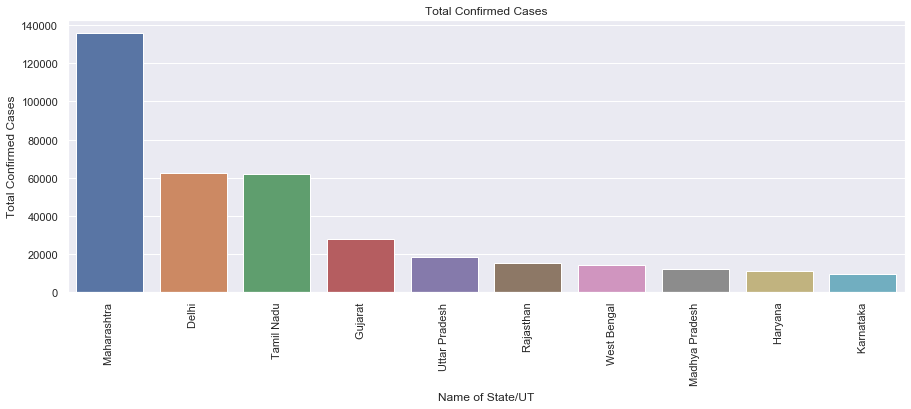

In [38]:
# Total confirmed cases plot
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'Name of State/UT', y = 'Total Confirmed Cases', data= max_cases_states)
plt.title('Total Confirmed Cases')
plt.xticks(rotation=90)
plt.savefig('Total Confirmed Cases.png', bbox_inches ="tight")
plt.show()

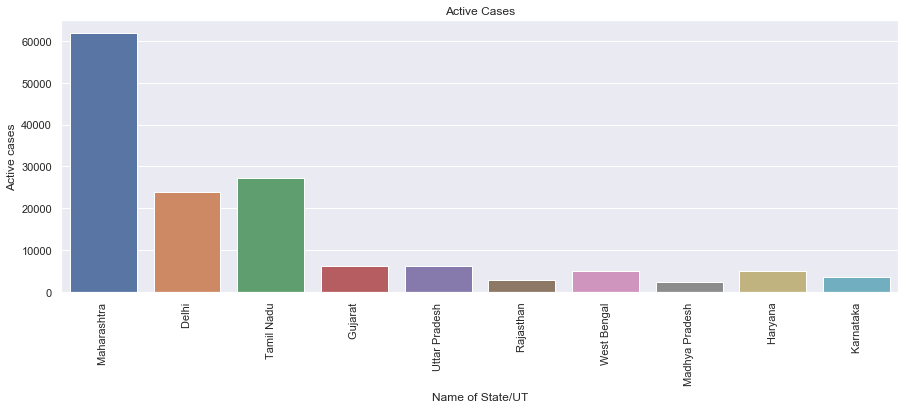

In [39]:
# Active cases plot
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'Name of State/UT', y = 'Active cases', data= max_cases_states)
plt.title('Active Cases')
plt.xticks(rotation=90)
plt.savefig('Active Cases.png', bbox_inches ="tight")
plt.show()

In [32]:
final_data.head(2)

,Name of State/UT,Active cases,Recovered cases,Deaths,Total Confirmed Cases
1,Maharashtra,61807,67706,6283,135796
2,Delhi,23820,36602,2233,62655


In [33]:
final_data['Name of State/UT']

1                                   Maharashtra
2                                         Delhi
3                                    Tamil Nadu
4                                       Gujarat
5                                 Uttar Pradesh
6                                     Rajasthan
7                                   West Bengal
8                                Madhya Pradesh
9                                       Haryana
10                                    Karnataka
11                               Andhra Pradesh
12                                    Telangana
13                                        Bihar
14                            Jammu and Kashmir
15                                        Assam
16                                       Odisha
17                                       Punjab
18                                       Kerala
19                                  Uttarakhand
20                                 Chhattisgarh
21                                    Jh

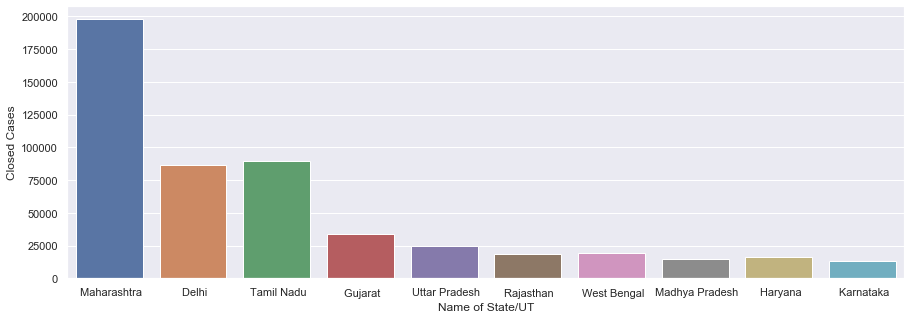

In [40]:
# Closed Cases of Top 10 states
#  Total Confirmed Cases - Active cases
plt.figure(figsize=(15,5))
sns.barplot(x = max_cases_states['Name of State/UT'], y=max_cases_states['Total Confirmed Cases'] + max_cases_states['Active cases'])
# plt.title('Closed Cases')
# plt.xticks(rotation=90)
plt.ylabel("Closed Cases")
plt.savefig('Closed Cases.png', bbox_inches ="tight")
plt.show()

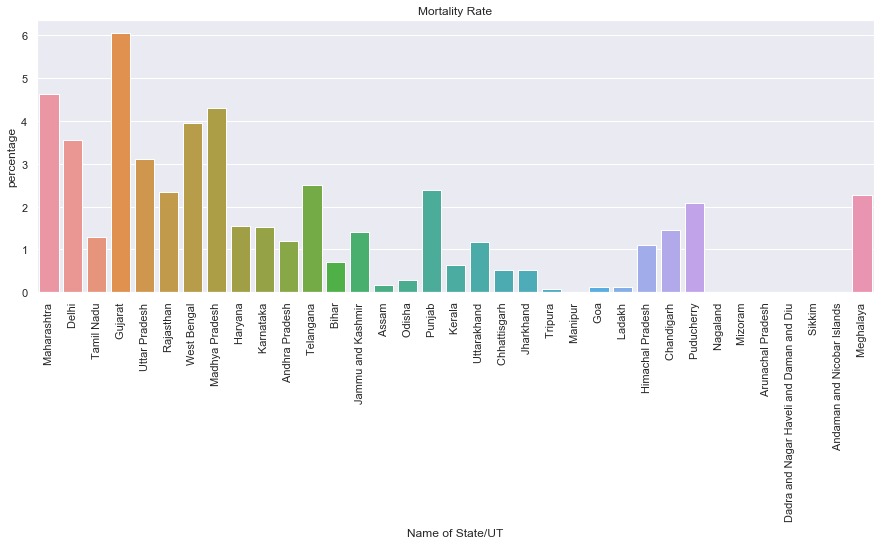

In [41]:
# Mortality rate
# (no of deaths/ total cases)*/100
plt.figure(figsize=(15,5))
sns.barplot(x = final_data['Name of State/UT'],y = (final_data['Deaths']/final_data['Total Confirmed Cases'])*100)
plt.title('Mortality Rate')
plt.xticks(rotation=90)
plt.ylabel("percentage")
plt.savefig('Mortality Rate.png', bbox_inches ="tight")
plt.show()
# plt.savefig('Mortality_rate.png')